## EDA FOR MICROSOFT MOVIE STUDIO ##
Data Analysis by: Shamla Araya

DSF-PT07 @ MORINGA

## Overview
***

This project performs an exploratory data analysis to learn the current pattern in the movie industry to come up with recommendations that would help Microsoft's new movie studio to get into this competitive market the right way. Movie data collected from different globally renowned sources will be used for this analysis and it will cover the time period from 2013-2019. Microsoft Movie Studio will find this analysis very useful in guiding their decision-making process regarding what movie genres to focus their investment in.

***

## Business Problem

***


Microsoft has decided to get into the movie business after observing that the movie business is becoming an attractive business. However they are facing a challenge on how to get into it as they don't know which movie genres are highly popular among audiences, which genres are most profitable and what are the production costs for these genres.

The purpose of this analysis is, therefore, to provide real life data based recommendations to tackle the above stated challenge. For this reason I will answer the following key points in my analysis:

* How many movies are made of each genre during 2013-2019?
* What genres are the most popular among the audience?
* Which ones are the top 5 genres that earned high profit in 2013-2019?
* What is the relationship between the production cost and the profits?

The answers to these questions will enable Microsoft enter the business with sharp competitive edge and actually produce movies that will return good profits.

***

## Data Understanding

The source of the data for this analysis are:

1. IMDB ['movie_ratings', 'movie_basics'](movie_id, primary_title, start_year, genres, averagerating)
2. The MovieDB (title, popularity, vote_average)
3. The Numbers (movie, domestic_gross, worldwide_gros, production_budget)

My goal for this analysis is requires that I use the variables from IMDB, TMDB and TN databases. You will notice that, after carefully reviewing the data, I have changed some of the column (variable) names to make it possible for me to join and marge the different datasets into one complete data frame for my analysis. I have also filtered the data to avoid any missing values and specify the period of my analysis which is 2013-2019, during the cleaning phase.

***

## LOADING AND CHECKING THE DATA

## 1. Loading Libraries And Reading the Datasets

In [711]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

Before I proceed let me explain the name I gave each of the datasets while loading them into the data frames.
1. tmdb for the data from "The Movie Database"
2. imdb for the data from "IMDB"
3. tn for the data from "The Numbers Movie Budget"

In [712]:
# Reading all the datasets to observe and decide which ones to use.

tmdb = pd.read_csv('data/tmdb.movies.csv', index_col = 0)
tn = pd.read_csv('data/tn.movie_budgets.csv')

con = sqlite3.connect('data/im.db')
movie_basics = pd.read_sql_query('SELECT * FROM movie_basics;', con)
movie_ratings = pd.read_sql_query('SELECT * FROM movie_ratings;', con)

***

## 2. Checking and preparing the data

Here I will check the data, clean it and prepare it for use for analysis. This process involves selecting the columns I want to use from each of the data sets, check for missing values and duplicates that might disrupt my analysis, drop them if they exist and finally merge the readied data into one data frame that I can use for analysis.

In [713]:
# Starting by joining the datasets from IMDB using the 'movie_id' variable which is common on both the 'movie_basics' and 'movie_ratings' datasets.

imdb = movie_basics.join(movie_ratings.set_index('movie_id'), 
                                      how = 'inner', on = 'movie_id', rsuffix = 'r')
# Checking the combined data frame.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, 0 to 146134
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [714]:
# Selecting and keeping the variables I need for this work from the data frame.
imdb = imdb[['movie_id', 'primary_title', 'start_year', 'genres', 'averagerating']]

# For consistency and clarity sake, let us rename the 'primary_title' column with 'title'.
imdb.rename(columns = {'primary_title': 'title'}, inplace=True)

# Checking the result.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   title          73856 non-null  object 
 2   start_year     73856 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73856 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ MB


In [715]:
# Checking the tmdb data.
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [716]:
# From tmdb data frame, I  want only the 'movie title', 'popularity' and the 'vote average' variables.
tmdb = tmdb[['title', 'popularity', 'vote_average']]

# Checking the result.
tmdb.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   popularity    26517 non-null  float64
 2   vote_average  26517 non-null  float64
dtypes: float64(2), object(1)
memory usage: 828.7+ KB


In [717]:
# Checking the tn data.
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [718]:
# Here as well I rename the 'movie' column with 'title'.
tn.rename(columns={'movie': 'title'}, inplace=True)

# Checking the result.
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


So far so good. However the information above shows that the values for 'production_budget', 'domestic_gross', and 'worldwide_gross' are in object types. This means they are treated as strings rather than integers or floats and I cannot use mathematical operations on them to calculate the values we need for analysis. Therefore I need to take away all the currency signs and the commas that are with in the numbers and change their type to float.

I will also need to make the entries in these variables consistent by mutating the figures to millions with only three decimal places.

In [719]:
# Cleaning the nonnumeric characters and changing the type to float.
tn['production_budget'] = tn['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn['domestic_gross'] = tn['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn['worldwide_gross'] = tn['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Mutating the gross earnings to millions and rounding them to three decimal places.
tn['production_budget'] = ((tn['production_budget'])/1000000).round(decimals=3)
tn['domestic_gross'] = ((tn['domestic_gross'])/1000000).round(decimals=3)
tn['worldwide_gross'] = ((tn['worldwide_gross'])/1000000).round(decimals=3)


tn.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   title              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In the following cell bellow I merge the different data frames I have prepared above. I chose to merge them on the 'title' column as all the data frames have that in common.

In [720]:
# Merging all the data into one data frame called merged_movie_data.

merged_movie_data = imdb.merge(tmdb, on = 'title').merge(tn, on = 'title')

merged_movie_data.head()

,movie_id,title,start_year,genres,averagerating,popularity,vote_average,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9,4.705,2.1,26,"Dec 31, 2012",45.0,0.000,0.074
1,tt0326592,The Overnight,2010,None,7.5,6.576,6.0,21,"Jun 19, 2015",0.2,1.110,1.166
2,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,8.919,5.6,17,"Mar 22, 2013",25.0,0.721,9.313
3,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,10.743,7.1,37,"Dec 25, 2013",91.0,58.237,187.861
4,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,19.373,6.3,67,"Sep 19, 2014",28.0,26.018,62.109


In [721]:
# Creating a column 'rating' by calculating the average of the 'averagerating' and 'vote_average' columns.
merged_movie_data['rating'] = (merged_movie_data['averagerating'] + merged_movie_data['vote_average'])/2

# then drop the 'averagerating' and 'vote_average' columns.
merged_movie_data.drop(columns = ['averagerating', 'vote_average'], inplace=True)

# Checking the result.
merged_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           3361 non-null   object 
 1   title              3361 non-null   object 
 2   start_year         3361 non-null   int64  
 3   genres             3349 non-null   object 
 4   popularity         3361 non-null   float64
 5   id                 3361 non-null   int64  
 6   release_date       3361 non-null   object 
 7   production_budget  3361 non-null   float64
 8   domestic_gross     3361 non-null   float64
 9   worldwide_gross    3361 non-null   float64
 10  rating             3361 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 289.0+ KB


In the code cell below, I will filter the data to include only the results of movies with rating points of 7 or higher, domestic_gross higher than 100,000000.00 and movies produced from 2013 onwards. I will then assign the result to a data frame called 'filtered_movie_data'

In [722]:
# Filtering the data and assigning it to a new data frame.

filtered_movie_data = merged_movie_data[(merged_movie_data['rating'] >= 7) & 
                                      (merged_movie_data['domestic_gross'] > 25.000000) & 
                                      (merged_movie_data['start_year'] > 2012)]
# Checking the result.
filtered_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 3 to 3359
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           288 non-null    object 
 1   title              288 non-null    object 
 2   start_year         288 non-null    int64  
 3   genres             288 non-null    object 
 4   popularity         288 non-null    float64
 5   id                 288 non-null    int64  
 6   release_date       288 non-null    object 
 7   production_budget  288 non-null    float64
 8   domestic_gross     288 non-null    float64
 9   worldwide_gross    288 non-null    float64
 10  rating             288 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 27.0+ KB


In [723]:
# Checking the first 5 entries of the data frame.
filtered_movie_data.head()

,movie_id,title,start_year,genres,popularity,id,release_date,production_budget,domestic_gross,worldwide_gross,rating
3,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",10.743,37,"Dec 25, 2013",91.0,58.237,187.861,7.20
22,tt0451279,Wonder Woman,2017,"Action,Adventure,Fantasy",31.618,55,"Jun 2, 2017",150.0,412.563,821.133,7.40
23,tt0453562,42,2013,"Biography,Drama,Sport",11.280,22,"Apr 12, 2013",31.0,95.020,97.471,7.25
26,tt0455944,The Equalizer,2014,"Action,Crime,Thriller",28.942,96,"Sep 26, 2014",55.0,101.531,192.904,7.20
32,tt0470752,Ex Machina,2014,"Drama,Mystery,Sci-Fi",18.485,72,"Apr 10, 2015",13.0,25.441,38.358,7.65


As we can see it here, there are movies that are categorized to multiple genres. This might impair my findings later on so I will split the genre column to represent an individual movie.
I might as well assign the result to a new data frame to avoid confusion.

In [724]:
# Splitting the 'genres' column to represent indivial movie.
cleaned_movie_data = filtered_movie_data.assign(genres = filtered_movie_data['genres'].str.split(',')).explode('genres')

# Checking the result.
cleaned_movie_data.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 3 to 3359
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           712 non-null    object 
 1   title              712 non-null    object 
 2   start_year         712 non-null    int64  
 3   genres             712 non-null    object 
 4   popularity         712 non-null    float64
 5   id                 712 non-null    int64  
 6   release_date       712 non-null    object 
 7   production_budget  712 non-null    float64
 8   domestic_gross     712 non-null    float64
 9   worldwide_gross    712 non-null    float64
 10  rating             712 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 66.8+ KB


In [725]:
# Checking the first 5 entries of the data frame.
cleaned_movie_data.head()

,movie_id,title,start_year,genres,popularity,id,release_date,production_budget,domestic_gross,worldwide_gross,rating
3,tt0359950,The Secret Life of Walter Mitty,2013,Adventure,10.743,37,"Dec 25, 2013",91.0,58.237,187.861,7.2
3,tt0359950,The Secret Life of Walter Mitty,2013,Comedy,10.743,37,"Dec 25, 2013",91.0,58.237,187.861,7.2
3,tt0359950,The Secret Life of Walter Mitty,2013,Drama,10.743,37,"Dec 25, 2013",91.0,58.237,187.861,7.2
22,tt0451279,Wonder Woman,2017,Action,31.618,55,"Jun 2, 2017",150.0,412.563,821.133,7.4
22,tt0451279,Wonder Woman,2017,Adventure,31.618,55,"Jun 2, 2017",150.0,412.563,821.133,7.4


So far I have loaded, checked, cleaned and prepared the data that I will use for analysis in the following cells.

***

### 3. ANALYZING THE DATA

At this stage I plan to analyze the data in terms of number of movies per genre, popularity, net profits and relationship between production cost and profit.

In [726]:
# Filtering the data from 'cleaned_movie_data' and assigning it to a new data frame 'movie_count'.
movie_count = cleaned_movie_data[['genres', 'title']]

# Checking the result.
movie_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 3 to 3359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  712 non-null    object
 1   title   712 non-null    object
dtypes: object(2)
memory usage: 16.7+ KB


In [727]:
# Counting the number of movies that belong to a specific genre in the cleaned data frame.
movie_per_genre = (movie_count.groupby('genres', as_index = False).title.nunique()).sort_values(
    by = 'title', ascending = False)

# Renaming the 'title' column to 'count'.
movie_per_genre.rename(columns = {'title': 'count'}, inplace=True)

# Checking the result.
movie_per_genre.head()

,genres,count
7,Drama,118
0,Action,56
1,Adventure,56
4,Comedy,45
3,Biography,39


In [728]:
# Creating a data frame that shows the popularity of each genre.
genre_popularity = cleaned_movie_data.groupby('genres', as_index = False).popularity.agg(
    ['count', 'mean']).sort_values(by = 'mean', ascending = False)

# Filtering the data and keeping only the genres that have more than 10 counts.
genre_popularity = genre_popularity[genre_popularity['count'] >= 10]
genre_popularity.rename(columns = {'mean': 'popularity'}, inplace=True)

# Checking the result.
genre_popularity


,genres,count,popularity
16,Sci-Fi,30,29.518367
1,Adventure,70,25.974143
9,Fantasy,18,25.906556
0,Action,72,24.093333
2,Animation,26,18.988308
4,Comedy,55,18.658509
8,Family,19,18.118474
3,Biography,50,17.001520
5,Crime,37,16.490973
11,Horror,14,16.085357


In [729]:
cleaned_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 3 to 3359
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           712 non-null    object 
 1   title              712 non-null    object 
 2   start_year         712 non-null    int64  
 3   genres             712 non-null    object 
 4   popularity         712 non-null    float64
 5   id                 712 non-null    int64  
 6   release_date       712 non-null    object 
 7   production_budget  712 non-null    float64
 8   domestic_gross     712 non-null    float64
 9   worldwide_gross    712 non-null    float64
 10  rating             712 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 66.8+ KB


I will now calculate the total net profit of each genre of movies produced between 2013 and 2019, in order to clearly understand which genres are most profitable.

To do this I will use the 'genres', 'production_budget', 'domestic_gross' and 'worldwide_gross' columns from the previous data frame and assign them to a new data frame called 'selected_movie_data'.

I will then need to convert the numeric figures into billions in order to create consistency. Then I will create a new column in the selected_movie_data data frame called 'profit_per_genre' that takes all the outcome of the calculation.

Finally I will create a new data frame that will be assigned the 'genres' and profit_per_genre' variables from the selected_movie_data to be used for plotting.

In [730]:
selected_movie_data = cleaned_movie_data[['genres', 'production_budget', 'domestic_gross', 'worldwide_gross']]
selected_movie_data = selected_movie_data.groupby('genres', as_index = False).sum()

# Let us mutate the financial information to billions.
selected_movie_data['production_budget'] = ((selected_movie_data['production_budget'])/1000).round(decimals=3)
selected_movie_data['domestic_gross'] = ((selected_movie_data['domestic_gross'])/1000).round(decimals=3)
selected_movie_data['worldwide_gross'] = ((selected_movie_data['worldwide_gross'])/1000).round(decimals=3)

# let us now calculate the net profit for each genre of movie produce within 2013-2019 and assign the result to a new column called profit_per_genre.
selected_movie_data['profit_per_genre'] = (selected_movie_data['domestic_gross'] + selected_movie_data['worldwide_gross']) - selected_movie_data['production_budget']
selected_movie_data = selected_movie_data.sort_values('profit_per_genre', ascending = False)

total_net_profit = selected_movie_data[['genres', 'profit_per_genre']]

total_net_profit

,genres,profit_per_genre
1,Adventure,54.540
0,Action,43.727
7,Drama,43.010
4,Comedy,25.758
16,Sci-Fi,22.928
2,Animation,18.765
9,Fantasy,14.666
3,Biography,13.527
8,Family,12.166
18,Thriller,10.597


***

### 4. VISUALIZING THE FINDINGS

In the cells that follow are the visual representations of the analysis I carried out namely:
1. Number of movies per genre.
2. Genre popularity.
3. Total net profit per genre.
4. Relationship between production cost and profits.

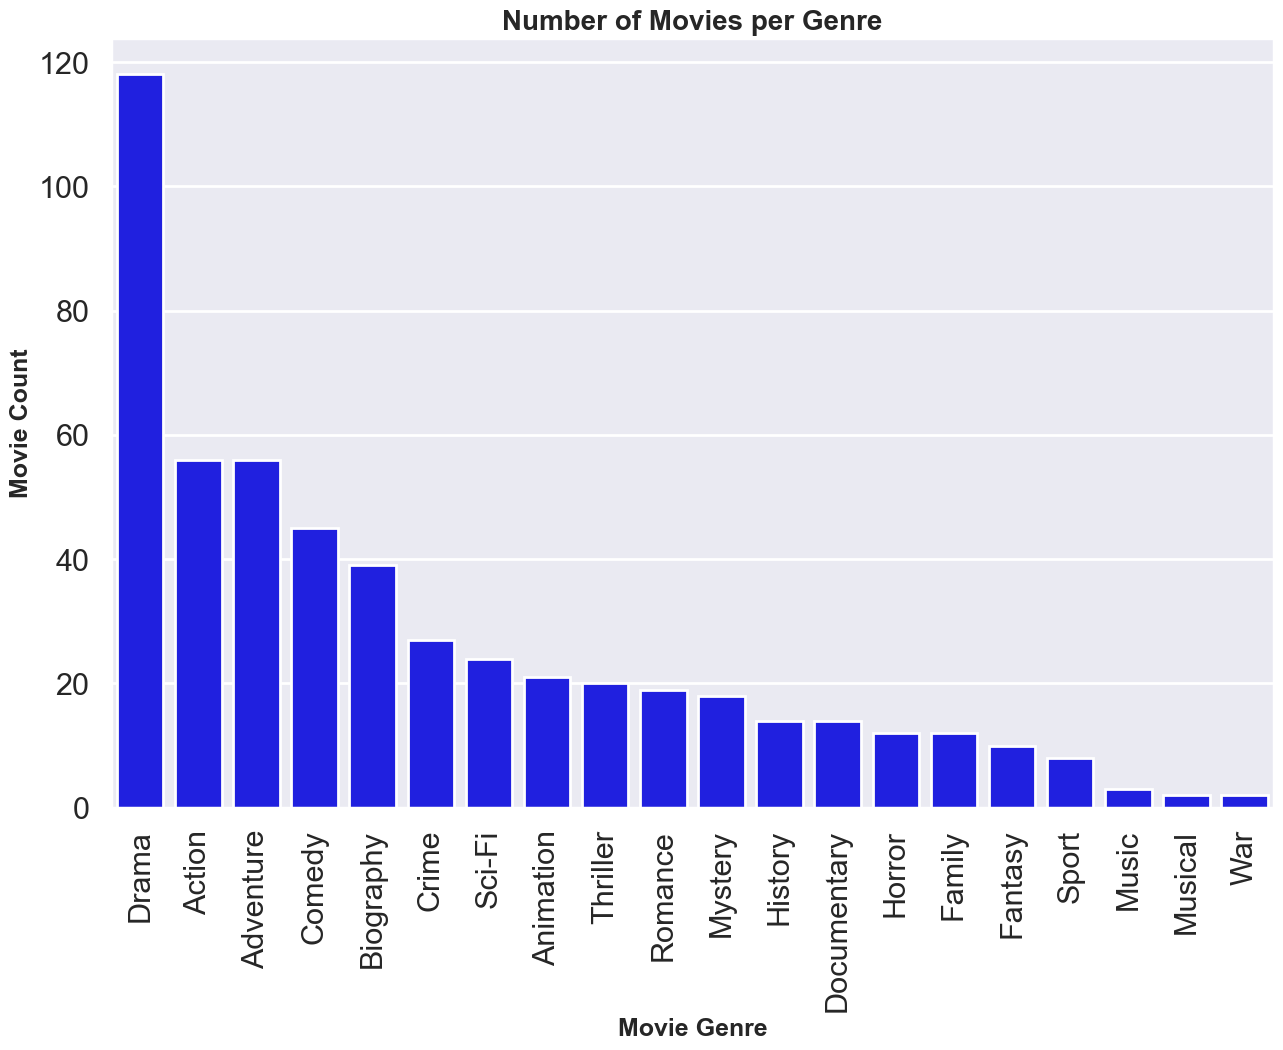

In [731]:
# Plotting the number of movies per genre.

plt.figure(figsize = (15, 10))
sns.barplot(x = 'genres', y = 'count', data = movie_per_genre, color = 'Blue')
plt.xticks(rotation = 90)
plt.title('Number of Movies per Genre', fontsize = 20, fontweight = 'bold')
plt.xlabel('Movie Genre', fontsize = 18, fontweight = 'bold')
plt.ylabel('Movie Count', fontsize = 18, fontweight = 'bold')
plt.show()

According to the graph above, majority of the movies produced between 2013-2019 are classified as Drama. The figure exceeds all other genres by at least double.

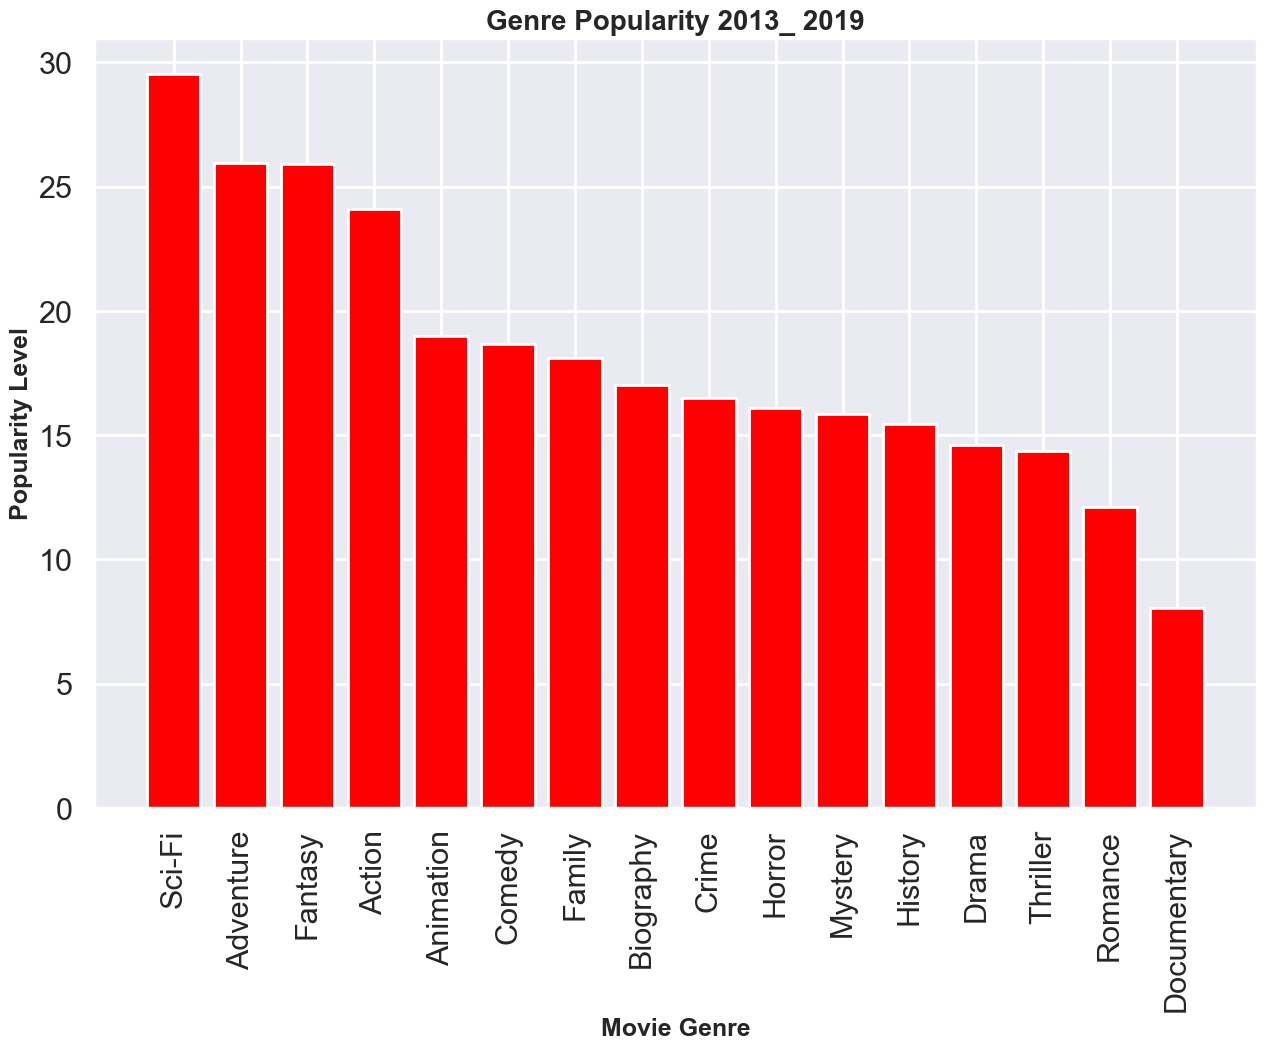

In [732]:
# Plotting genre popularity.
popularity_figure, ax = plt.subplots(figsize = (15, 10))
plt.bar(x = 'genres', height ='popularity', data = genre_popularity, color = 'Red')
plt.xticks(rotation = 90)
plt.title('Genre Popularity 2013_ 2019', fontsize = 20, fontweight = 'bold')
plt.xlabel('Movie Genre', fontsize = 18, fontweight = 'bold')
plt.ylabel('Popularity Level', fontsize = 18, fontweight = 'bold')
plt.show()

This plot shows that SciFi, Adventure, Fantasy, Action and Animation are the top 5 most popular genres.

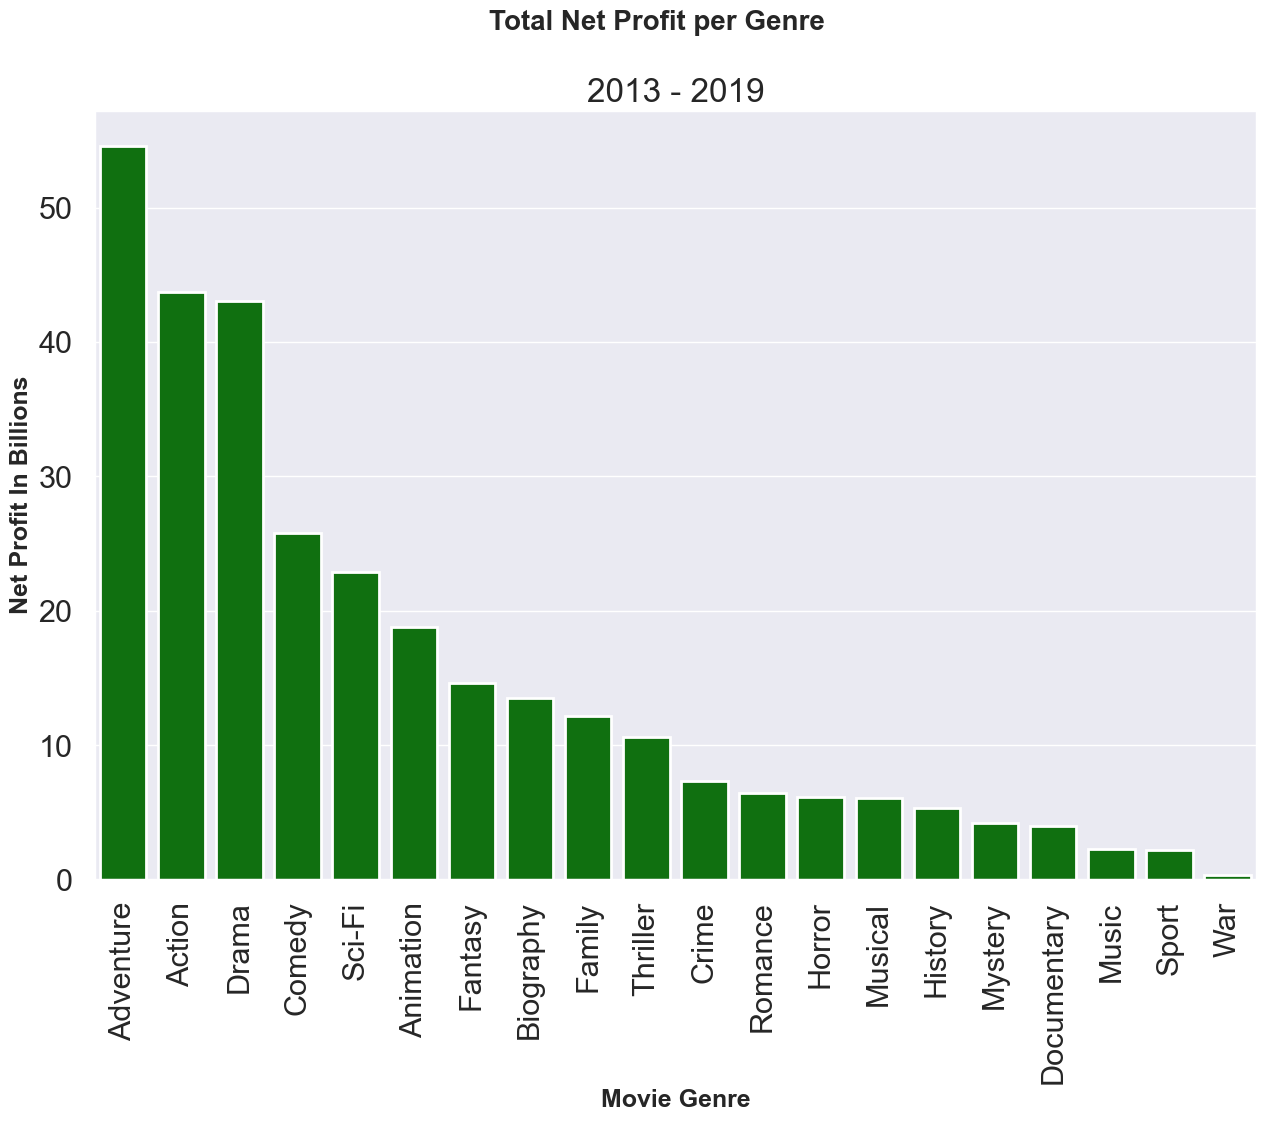

In [733]:
# Plotting the net profit per genre over the 6 years span from 2013-2019.

net_profit = plt.figure(figsize = (15, 10))
sns.set_style('darkgrid')
sns.set_context('poster', rc = {'grid.linewidth': 1})
sns.barplot(x = 'genres', y = 'profit_per_genre', data = total_net_profit, color = 'green')
plt.xticks(rotation = 90)
plt.title('2013 - 2019')
plt.suptitle('Total Net Profit per Genre', fontsize = 20, fontweight = 'bold')
plt.xlabel('Movie Genre', fontsize = 18, fontweight = 'bold')
plt.ylabel('Net Profit In Billions', fontsize = 18, fontweight = 'bold')

plt.show()


As we can see it from this analysis, the Adventure and Action genres are the top earning ones with 54.540b USD and 43.727b USD respectively. Drama on the other hand inspite of the number of movies, is only third when it comes to profitability with 43.010b USD. 

Finally the relationship between the production budget and the profitability of the genres by running a scatter plot. This is the main plot of the series that will be shown in the chart below and will demonstrate how these variables are correlated to each other.

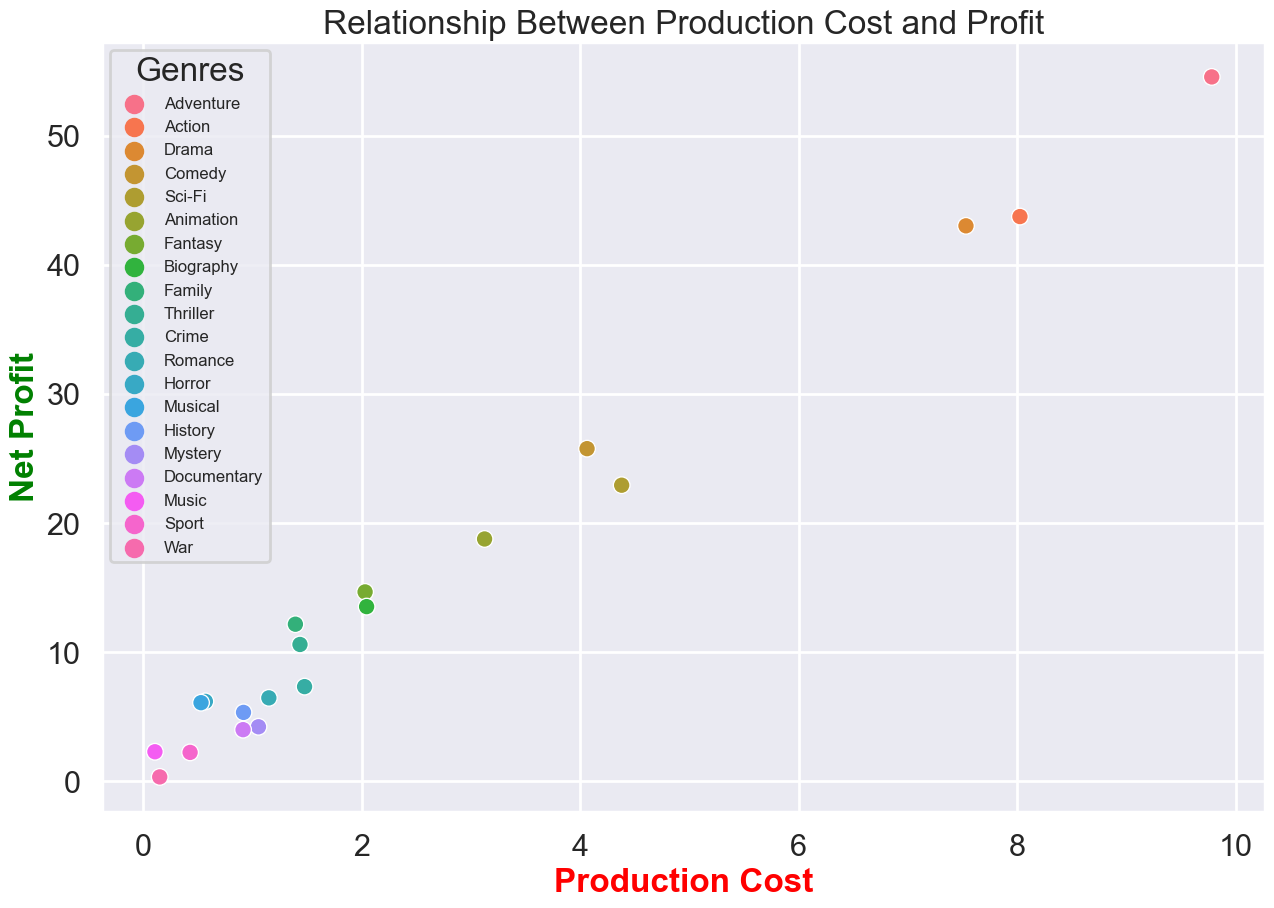

In [734]:
# Checking the relationship between production cost and profitability using scatter plot.

plt.figure(figsize = (15, 10))
sns.set_style('darkgrid')
sns.set_context('poster', rc = {'grid.linewidth': 2})
sns.scatterplot(data=selected_movie_data, x="production_budget", y="profit_per_genre", hue="genres", sizes=(20, 200))
plt.legend(loc='upper left', title='Genres', fontsize = 12)
plt.title('Production Budget vs Net Profitability', fontweight='bold')
plt.xlabel("Production Cost", color='Red', fontweight='bold')
plt.ylabel("Net Profit", color='Green', fontweight='bold')
plt.title("Relationship Between Production Cost and Profit")
plt.grid(True)

plt.show()


As we see it in the scatter plot above, the production cost and profit are positively correlated. Which means that the most profitable genres require high production budget. On the other hand low badget movies aren't very profitable.

***

## CONCLUSIONS

To tackle the problem presented by the Microsoft Movie Studio, I have used data collected from three of the global movies datasets namely; the IMDB, TMDB and TNDB and performed exploratory analysis. In order to come up with effective and helpful recommendations, it is crucial that the data collected be as latest ad possible. Based on this understanding, this analysis covers movies produced between 2013 - 2019 and shows that:

* During this period 118 Drama movies were made.
* Sci-Fi, Adventure, Fantasy, Action and Animation were the top 5 most popular genres.
* Adventure, Action, Drama, Comedy, and  SciFi were the top five most profitable genres
* The production cost is positively correlated to profit.

***

## RECOMMENDATIONS

Based on the result of the analysis, I recommend the following:

* The Microsoft Movie Studio should focus on producing Adventure, Action, Drama, Comedy, and SciFi movies for high profit earning.
* The studio should also understand that the most profitable genres cost more to produce. With this in mind Microsoft should focus on allocating enough budget and producing the most popular movies. 
* The studio should also consider producing high budget Animation movies as animation is one of the top 5 most popular genres.

## FINAL NOTE:

The movie business is a very competitive and ever evolving sector. Even though this analysis has yielded some good results, it still could be improved by using the latest datasets and also data that takes demographics of the audiences and the number of demands per movie in a given platform into the equation. I hope to be able to do such analysis for Microsoft with these data in the future. 

***